In [1]:
!pip install transformers datasets rouge_score bert-score spacy scikit-learn sentencepiece torch evaluate
!python -m spacy download en_core_web_sm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=577c56df21aa3d75fb417adb4abbd66e0754d51561239bd0590c37cde53e71d3
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Loading data from /content/drive/MyDrive/MS_Fianl_Project/data1/validation.json...
Loaded 5 samples.
Processing 5 samples...
Using device: cuda


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Using device: cuda


Evaluating samples:  20%|██        | 1/5 [00:05<00:20,  5.07s/it]


Sample 1:
Original Text (truncated): Part of the Mariana Islands Archipelago, the CNMI is a chain of 14 islands in the western Pacific Ocean, just north of Guam and about 3,200 miles west of Hawaii. The CNMI has a total population of 53,...
Extractive Summary (truncated): The Consolidated Natural Resources Act of 2008 amended the U.S.– CNMI covenant to apply federal immigration law to the CNMI after a transition period. Under the program, foreign workers are able to ob...
Reference Summary: Pub. L. No. 110-229, enacted in 2008, amended the U.S.-CNMI covenant to apply federal immigration law to the CNMI after a transition period. The law required the Department of Homeland Security (DHS) to establish a temporary work permit program for foreign workers. DHS is required to decrease the number of permits issued annually, reducing them to zero by the end of the transition period, scheduled for December 31, 2019. To implement the law, DHS established a new work permit program in 2011. Under

Evaluating samples:  40%|████      | 2/5 [00:12<00:20,  6.75s/it]


Sample 2:
Original Text (truncated): The U.S. pipeline network includes both interstate and intrastate pipelines, the vast majority of which fall into the latter category: Interstate pipelines: Interstate pipelines are primarily large-vo...
Extractive Summary (truncated): At the federal level, PHMSA is responsible for developing regulations for domestic interstate and intrastate natural gas and hazardous liquid pipelines. Under federal pipeline safety laws, states may ...
Reference Summary: PHMSA oversees the safety of interstate and intrastate natural gas and hazardous liquid pipelines. PHMSA certifies states to oversee intrastate pipelines, and some states also act as PHMSA's “agents” to supplement the federal inspection workforce for interstate pipelines. In recent years PHMSA has signaled a move away from using interstate agent agreements. Recent funding increases have enabled PHMSA to hire additional federal inspectors. States may receive annual grants to reimburse up to 80 perce

Evaluating samples: 100%|██████████| 5/5 [00:45<00:00,  9.14s/it]



Evaluating Constraint-Guided BART summaries...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Evaluating Standard BART summaries...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



===== Evaluation Results =====

Constraint-Guided BART:
ROUGE-1: 0.2683
ROUGE-2: 0.0724
ROUGE-L: 0.1367
BERTScore F1: 0.8361
FactCC Score: 0.8785

Standard BART:
ROUGE-1: 0.2666
ROUGE-2: 0.0645
ROUGE-L: 0.1339
BERTScore F1: 0.8322
FactCC Score: 0.9056
Results saved to summarization_results.csv
Comparison plot saved to summarization_comparison.png
Sample summaries saved to sample_summaries.csv


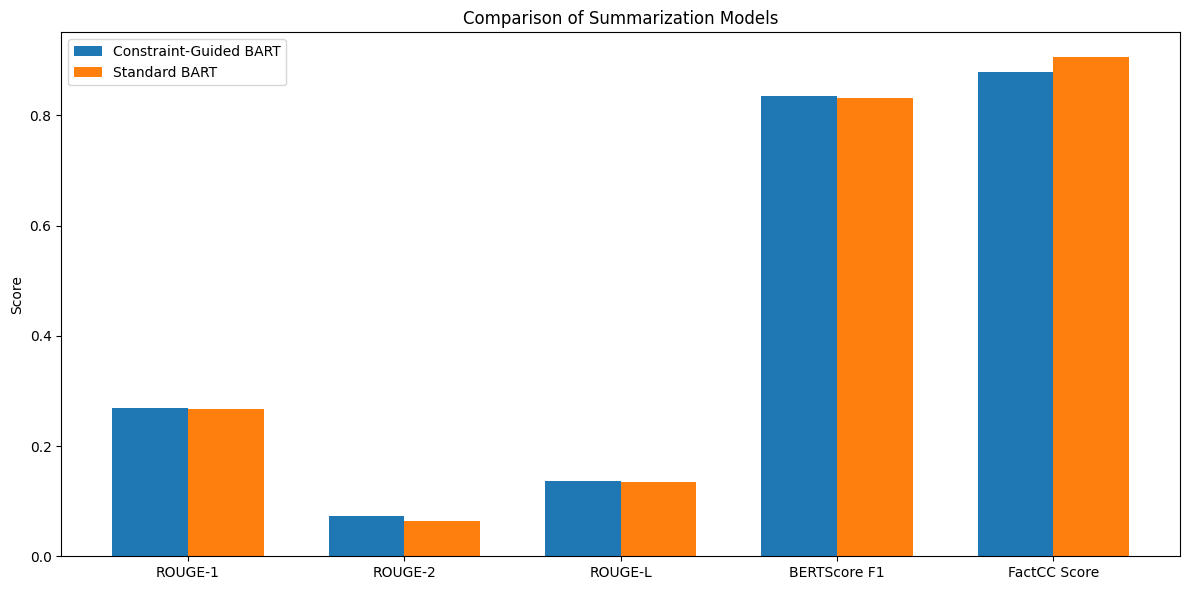

In [4]:
import json
import torch
import numpy as np
import pandas as pd
import spacy
import nltk
import evaluate
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import List, Dict, Tuple, Optional, Union, Any
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    LogitsProcessorList,
    LogitsProcessor,
    BeamSearchScorer
)
from nltk.tokenize import sent_tokenize
from bert_score import score as bert_score_score # Renamed the imported function

# Set the number of samples to process here
NUM_SAMPLES = 5  # Change this to 5, 10, or any number you want

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab resource

# Load spaCy model for NLP tasks
try:
    nlp = spacy.load("en_core_web_sm")
except:
    # If model not found, download it
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Load evaluation metrics
rouge = evaluate.load('rouge')

class KeySentenceExtractor:
    """Extract key sentences from text using TF-IDF and MMR."""

    def __init__(self, extraction_percent=0.25, lambda_mmr=0.7):
        """
        Initialize the extractor.

        Args:
            extraction_percent: Percentage of sentences to extract
            lambda_mmr: Lambda parameter for MMR (higher values favor relevance over diversity)
        """
        self.extraction_percent = extraction_percent
        self.lambda_mmr = lambda_mmr
        self.vectorizer = TfidfVectorizer(stop_words='english')

    def extract_key_sentences(self, text: str) -> List[str]:
        """
        Extract key sentences from the text using TF-IDF and MMR.

        Args:
            text: Input text

        Returns:
            List of key sentences
        """
        # Split text into sentences
        sentences = sent_tokenize(text)
        if len(sentences) <= 1:
            return sentences

        # Calculate TF-IDF vectors
        tfidf_matrix = self.vectorizer.fit_transform(sentences)

        # Calculate sentence similarity matrix
        similarities = cosine_similarity(tfidf_matrix)

        # Calculate sentence scores (sum of similarities)
        sentence_scores = similarities.sum(axis=1)

        # Determine number of sentences to extract
        num_to_extract = max(1, int(len(sentences) * self.extraction_percent))
        num_to_extract = min(num_to_extract, len(sentences))

        # Use MMR to select diverse sentences
        selected_indices = []
        unselected_indices = list(range(len(sentences)))

        # Select first sentence with highest score
        selected_indices.append(unselected_indices.pop(np.argmax(sentence_scores)))

        # Select remaining sentences using MMR
        for _ in range(num_to_extract - 1):
            if not unselected_indices:
                break

            mmr_scores = []
            for i in unselected_indices:
                # Calculate relevance term (similarity to query/document)
                relevance = sentence_scores[i]

                # Calculate diversity term (maximum similarity to already selected sentences)
                if selected_indices:
                    diversity = max(similarities[i, j] for j in selected_indices)
                else:
                    diversity = 0

                # Calculate MMR score
                mmr = self.lambda_mmr * relevance - (1 - self.lambda_mmr) * diversity
                mmr_scores.append(mmr)

            # Select sentence with highest MMR score
            next_idx = unselected_indices.pop(np.argmax(mmr_scores))
            selected_indices.append(next_idx)

        # Return selected sentences in original order
        selected_indices.sort()
        return [sentences[i] for i in selected_indices]

class ConstraintExtractor:
    """Extract factual constraints from key sentences."""

    def __init__(self):
        """Initialize the constraint extractor."""
        self.nlp = nlp

    def extract_constraints(self, sentences: List[str]) -> List[Dict]:
        """
        Extract factual constraints from sentences.

        Args:
            sentences: List of sentences

        Returns:
            List of constraint dictionaries
        """
        constraints = []

        for sentence in sentences:
            doc = self.nlp(sentence)

            # Extract named entities
            entities = [(ent.text, ent.label_) for ent in doc.ents]

            # Extract numerical values
            numbers = [token.text for token in doc if token.like_num]

            # Extract key noun phrases
            noun_phrases = [chunk.text for chunk in doc.noun_chunks]

            # Create constraint dictionary
            constraint = {
                'sentence': sentence,
                'entities': entities,
                'numbers': numbers,
                'noun_phrases': noun_phrases
            }

            constraints.append(constraint)

        return constraints

class ConstrainedLogitsProcessor(LogitsProcessor):
    """Custom logits processor that boosts probabilities of constraint tokens."""

    def __init__(self, constraint_token_ids: List[int], boost_factor: float = 2.0):
        """
        Initialize the constrained logits processor.

        Args:
            constraint_token_ids: List of token IDs to boost
            boost_factor: Factor by which to boost constraint token probabilities
        """
        self.constraint_token_ids = set(constraint_token_ids)
        self.boost_factor = boost_factor

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor) -> torch.FloatTensor:
        """
        Process logits to boost constraint tokens.

        Args:
            input_ids: Current sequence of token IDs
            scores: Scores for next token prediction

        Returns:
            Modified scores with boosted constraint tokens
        """
        # Create a mask for constraint tokens
        constraint_mask = torch.zeros_like(scores)
        for token_id in self.constraint_token_ids:
            if token_id < scores.shape[-1]:  # Ensure token ID is within vocabulary
                constraint_mask[:, token_id] = 1

        # Apply boost to constraint tokens
        scores = scores + (constraint_mask * self.boost_factor)

        return scores

class ConstraintGuidedBART:
    """BART model guided by factual constraints."""

    def __init__(self, model_name: str = "facebook/bart-large-cnn", device: str = None):
        """
        Initialize the constraint-guided BART model.

        Args:
            model_name: Name of the BART model to use
            device: Device to use for computation (cpu or cuda)
        """
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(self.device)
        self.key_sentence_extractor = KeySentenceExtractor()
        self.constraint_extractor = ConstraintExtractor()

    def _get_constraint_token_ids(self, constraints: List[Dict]) -> List[int]:
        """
        Convert constraints to token IDs.

        Args:
            constraints: List of constraint dictionaries

        Returns:
            List of token IDs for constraints
        """
        constraint_texts = []

        for constraint in constraints:
            # Add entities
            constraint_texts.extend([ent[0] for ent in constraint['entities']])

            # Add numbers
            constraint_texts.extend(constraint['numbers'])

            # Add noun phrases
            constraint_texts.extend(constraint['noun_phrases'])

        # Remove duplicates and tokenize
        constraint_texts = list(set(constraint_texts))
        constraint_token_ids = []

        for text in constraint_texts:
            tokens = self.tokenizer.encode(text, add_special_tokens=False)
            constraint_token_ids.extend(tokens)

        # Remove duplicates and return
        return list(set(constraint_token_ids))

    def summarize(self, text: str, extractive_summary: str = None,
                  boost_factor: float = 2.0, extraction_percent: float = 0.1,
                  min_length: int = None, max_length: int = None,
                  num_beams: int = 4) -> str:
        """
        Generate a constrained abstractive summary.

        Args:
            text: Original text to summarize
            extractive_summary: Extractive summary (if None, will use the original text)
            boost_factor: Factor by which to boost constraint token probabilities
            extraction_percent: Percentage of sentences to extract as constraints
            min_length: Minimum length of generated summary
            max_length: Maximum length of generated summary
            num_beams: Number of beams for beam search

        Returns:
            Generated abstractive summary
        """
        # Use extractive summary if provided, otherwise use original text
        source_for_constraints = extractive_summary if extractive_summary else text

        # Set default min and max length based on input length
        if min_length is None:
            min_length = max(30, len(text.split()) // 20)
        if max_length is None:
            max_length = max(100, len(text.split()) // 10)

        # Extract key sentences
        self.key_sentence_extractor.extraction_percent = extraction_percent
        key_sentences = self.key_sentence_extractor.extract_key_sentences(source_for_constraints)

        # Extract constraints from key sentences
        constraints = self.constraint_extractor.extract_constraints(key_sentences)

        # Get constraint token IDs
        constraint_token_ids = self._get_constraint_token_ids(constraints)

        # Create constrained logits processor
        logits_processor = LogitsProcessorList([
            ConstrainedLogitsProcessor(constraint_token_ids, boost_factor)
        ])

        # Tokenize input
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, max_length=1024).to(self.device)

        # Generate summary with constraints
        with torch.no_grad():
            outputs = self.model.generate(
                inputs.input_ids,
                attention_mask=inputs.attention_mask,
                min_length=min_length,
                max_length=max_length,
                num_beams=num_beams,
                logits_processor=logits_processor,
                early_stopping=True
            )

        # Decode and return summary
        summary = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return summary

class StandardBART:
    """Standard BART model for abstractive summarization."""

    def __init__(self, model_name: str = "facebook/bart-large-cnn", device: str = None):
        """
        Initialize the standard BART model.

        Args:
            model_name: Name of the BART model to use
            device: Device to use for computation (cpu or cuda)
        """
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(self.device)

    def summarize(self, text: str, min_length: int = None, max_length: int = None,
                  num_beams: int = 4) -> str:
        """
        Generate an abstractive summary.

        Args:
            text: Text to summarize
            min_length: Minimum length of generated summary
            max_length: Maximum length of generated summary
            num_beams: Number of beams for beam search

        Returns:
            Generated abstractive summary
        """
        # Set default min and max length based on input length
        if min_length is None:
            min_length = max(30, len(text.split()) // 20)
        if max_length is None:
            max_length = max(100, len(text.split()) // 10)

        # Tokenize input
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, max_length=1024).to(self.device)

        # Generate summary
        with torch.no_grad():
            outputs = self.model.generate(
                inputs.input_ids,
                attention_mask=inputs.attention_mask,
                min_length=min_length,
                max_length=max_length,
                num_beams=num_beams,
                early_stopping=True
            )

        # Decode and return summary
        summary = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return summary

class FactCCEvaluator:
    """Evaluator for factual consistency using a simplified approach."""

    def __init__(self):
        """Initialize the FactCC evaluator."""
        pass

    def evaluate(self, source: str, summary: str) -> float:
        """
        Evaluate factual consistency between source and summary.

        Args:
            source: Source document
            summary: Generated summary

        Returns:
            Factual consistency score (0-1)
        """
        # For this implementation, we'll use a simplified approach
        # In a real implementation, you would use a trained FactCC model

        # Tokenize source and summary
        doc = nlp(source)
        summary_doc = nlp(summary)

        # Extract named entities from source and summary
        source_entities = set([ent.text.lower() for ent in doc.ents])
        summary_entities = set([ent.text.lower() for ent in summary_doc.ents])

        # Calculate entity overlap as a proxy for factual consistency
        if not summary_entities:
            return 1.0  # No entities to check

        overlap = len(source_entities.intersection(summary_entities))
        total = len(summary_entities)

        return overlap / total if total > 0 else 1.0

def evaluate_summaries(original_texts: List[str], extractive_summaries: List[str],
                       reference_summaries: List[str], generated_summaries: List[str]) -> Dict:
    """
    Evaluate generated summaries using multiple metrics.

    Args:
        original_texts: List of original texts
        extractive_summaries: List of extractive summaries
        reference_summaries: List of reference summaries
        generated_summaries: List of generated summaries

    Returns:
        Dictionary of evaluation results
    """
    # Calculate ROUGE scores
    rouge_results = rouge.compute(
        predictions=generated_summaries,
        references=reference_summaries,
        use_stemmer=True
    )

    # Calculate BERTScore
    P, R, F1 = bert_score_score( # Corrected function call
        generated_summaries,
        reference_summaries,
        lang="en",
        verbose=False
    )

    bert_score_result = {
        'precision': P.mean().item(),
        'recall': R.mean().item(),
        'f1': F1.mean().item()
    }

    # Calculate FactCC scores
    factcc_evaluator = FactCCEvaluator()
    factcc_scores = []

    for original, summary in zip(original_texts, generated_summaries):
        factcc_scores.append(factcc_evaluator.evaluate(original, summary))

    factcc_result = {
        'score': sum(factcc_scores) / len(factcc_scores) if factcc_scores else 0
    }

    # Combine all results
    results = {
        'rouge': rouge_results,
        'bert_score': bert_score_result,
        'factcc': factcc_result
    }

    return results

def load_data(file_path: str, num_samples: int = None) -> List[Dict[str, str]]:
    """
    Load data from a JSON file.

    Args:
        file_path: Path to the JSON file
        num_samples: Number of samples to load (None for all)

    Returns:
        List of data samples
    """
    data = []
    print(f"Loading data from {file_path}...")
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON: {line[:100]}... Error: {e}")
            if num_samples is not None and len(data) >= num_samples:
                break
    print(f"Loaded {len(data)} samples.")
    return data

def main(num_samples=NUM_SAMPLES):
    # Load data
    data_path = "/content/drive/MyDrive/MS_Fianl_Project/data1/validation.json"
    data = load_data(data_path, num_samples=num_samples)

    print(f"Processing {num_samples} samples...")

    # Initialize models
    constraint_guided_bart = ConstraintGuidedBART()
    standard_bart = StandardBART()

    # Generate summaries and evaluate
    original_texts = []
    extractive_summaries = []
    reference_summaries = []
    constraint_guided_summaries = []
    standard_summaries = []

    for i, sample in enumerate(tqdm(data, desc="Evaluating samples")):
        original_text = sample.get("original_text", "")
        extractive_summary = sample.get("extractive_summary", "")
        reference_summary = sample.get("abstractive_summary", "")

        if not original_text or not extractive_summary or not reference_summary:
            continue

        # Generate summaries
        constraint_guided_summary = constraint_guided_bart.summarize(
            original_text,
            extractive_summary=extractive_summary,
            extraction_percent=0.1,  # Extract top 10% of sentences as constraints
            boost_factor=2.0  # Boost constraint tokens by factor of 2
        )

        standard_summary = standard_bart.summarize(original_text)

        # Store results
        original_texts.append(original_text)
        extractive_summaries.append(extractive_summary)
        reference_summaries.append(reference_summary)
        constraint_guided_summaries.append(constraint_guided_summary)
        standard_summaries.append(standard_summary)

        # Print sample for first few examples
        if i < 2:
            print(f"\nSample {i+1}:")
            print(f"Original Text (truncated): {original_text[:200]}...")
            print(f"Extractive Summary (truncated): {extractive_summary[:200]}...")
            print(f"Reference Summary: {reference_summary}")
            print(f"Constraint-Guided Summary: {constraint_guided_summary}")
            print(f"Standard Summary: {standard_summary}")

    # Evaluate constraint-guided summaries
    print("\nEvaluating Constraint-Guided BART summaries...")
    constraint_guided_results = evaluate_summaries(
        original_texts,
        extractive_summaries,
        reference_summaries,
        constraint_guided_summaries
    )

    # Evaluate standard summaries
    print("\nEvaluating Standard BART summaries...")
    standard_results = evaluate_summaries(
        original_texts,
        extractive_summaries,
        reference_summaries,
        standard_summaries
    )

    # Print results
    print("\n===== Evaluation Results =====")
    print("\nConstraint-Guided BART:")
    print(f"ROUGE-1: {constraint_guided_results['rouge']['rouge1']:.4f}")
    print(f"ROUGE-2: {constraint_guided_results['rouge']['rouge2']:.4f}")
    print(f"ROUGE-L: {constraint_guided_results['rouge']['rougeL']:.4f}")
    print(f"BERTScore F1: {constraint_guided_results['bert_score']['f1']:.4f}")
    print(f"FactCC Score: {constraint_guided_results['factcc']['score']:.4f}")

    print("\nStandard BART:")
    print(f"ROUGE-1: {standard_results['rouge']['rouge1']:.4f}")
    print(f"ROUGE-2: {standard_results['rouge']['rouge2']:.4f}")
    print(f"ROUGE-L: {standard_results['rouge']['rougeL']:.4f}")
    print(f"BERTScore F1: {standard_results['bert_score']['f1']:.4f}")
    print(f"FactCC Score: {standard_results['factcc']['score']:.4f}")

    # Save results to CSV
    results_df = pd.DataFrame({
        'Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore F1', 'FactCC Score'],
        'Constraint-Guided BART': [
            constraint_guided_results['rouge']['rouge1'],
            constraint_guided_results['rouge']['rouge2'],
            constraint_guided_results['rouge']['rougeL'],
            constraint_guided_results['bert_score']['f1'],
            constraint_guided_results['factcc']['score']
        ],
        'Standard BART': [
            standard_results['rouge']['rouge1'],
            standard_results['rouge']['rouge2'],
            standard_results['rouge']['rougeL'],
            standard_results['bert_score']['f1'],
            standard_results['factcc']['score']
        ]
    })

    results_df.to_csv('summarization_results.csv', index=False)
    print("Results saved to summarization_results.csv")

    # Plot comparison
    metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore F1', 'FactCC Score']
    constraint_guided_scores = [
        constraint_guided_results['rouge']['rouge1'],
        constraint_guided_results['rouge']['rouge2'],
        constraint_guided_results['rouge']['rougeL'],
        constraint_guided_results['bert_score']['f1'],
        constraint_guided_results['factcc']['score']
    ]
    standard_scores = [
        standard_results['rouge']['rouge1'],
        standard_results['rouge']['rouge2'],
        standard_results['rouge']['rougeL'],
        standard_results['bert_score']['f1'],
        standard_results['factcc']['score']
    ]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, constraint_guided_scores, width, label='Constraint-Guided BART')
    rects2 = ax.bar(x + width/2, standard_scores, width, label='Standard BART')

    ax.set_ylabel('Score')
    ax.set_title('Comparison of Summarization Models')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.tight_layout()
    plt.savefig('summarization_comparison.png')
    print("Comparison plot saved to summarization_comparison.png")

    # Save sample summaries
    sample_results = []
    for i in range(min(5, len(original_texts))):
        sample_results.append({
            'Original Text': original_texts[i][:500] + '...' if len(original_texts[i]) > 500 else original_texts[i],
            'Extractive Summary': extractive_summaries[i][:300] + '...' if len(extractive_summaries[i]) > 300 else extractive_summaries[i],
            'Reference Summary': reference_summaries[i],
            'Constraint-Guided Summary': constraint_guided_summaries[i],
            'Standard Summary': standard_summaries[i]
        })

    sample_df = pd.DataFrame(sample_results)
    sample_df.to_csv('sample_summaries.csv', index=False)
    print("Sample summaries saved to sample_summaries.csv")

if __name__ == "__main__":
    # Install required packages if not already installed
    try:
        import bert_score
    except ImportError:
        import os
        os.system("pip install bert-score")
        import bert_score

    # You can change NUM_SAMPLES at the top of the script
    # or pass a different value here
    main(num_samples=5)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
